In [142]:
# Avoid warnings
import warnings
warnings.filterwarnings("ignore")

# Spam or Ham Detection using Machine Learning
### **Project Overview: Spam or Ham Detection using Machine Learning**  
The objective of this project is to build a machine learning model that can classify messages as either spam or ham. The model is trained using a dataset containing labeled messages, where each message is categorized as spam or ham. By analyzing features like word frequency, message length, and special characters, the model learns patterns that help in automatic classification.  



## _Project Methodology_
**CRISP-ML(Q) : Cross-Industry Standard Process for the development of Machine Learning applications with Quality assurance methodology.**
- *Business Understanding*
- *Data Preparation* (Data Cleaning, EDA, Feature Engineering)
- *Model Building*
- *Model Evaluation*
- *Model Deployment*
- *Model Management*
  

### Data Understanding:-
- **Category** : It contails the label(output) of each record(**spam** & **ham**).
  - **Spam** refers to unsolicited, irrelevant, or inappropriate messages, often sent in bulk, typically for advertising, phishing, or spreading malware. Common examples include spam emails, promotional messages, and scam texts.  
  - **Ham** refers to legitimate, non-spam messages. These are genuine emails or texts from trusted sources that are relevant to the recipient.  

- **Message** :It contains the text.
  

### Data Preparation 

#### Data Cleaning


In [216]:
# Required Models for Data Cleaning

import pandas as pd
import numpy as np

In [217]:
# Load Data
data = pd.read_csv(r"../Data/spam.csv")

In [218]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [219]:
# Shape of the data.

data.shape

(5572, 2)

In [220]:
# Check Duplicate Records.

data.duplicated().sum()

415

There are **415** Duplicate values in text column.

In [221]:
# Drop Duplicate values.

data = data.loc[(~data["Message"].duplicated())]

In [222]:
# Cheack for NAN Values.

data.isna().sum()

Category    0
Message     0
dtype: int64

There are no NAN Values in Data set.

#### EDA (Exploratory Data Analysis)

In [223]:
# Importing Visulization Moules.
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:

data.shape

(5157, 2)

In [225]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='Category'>

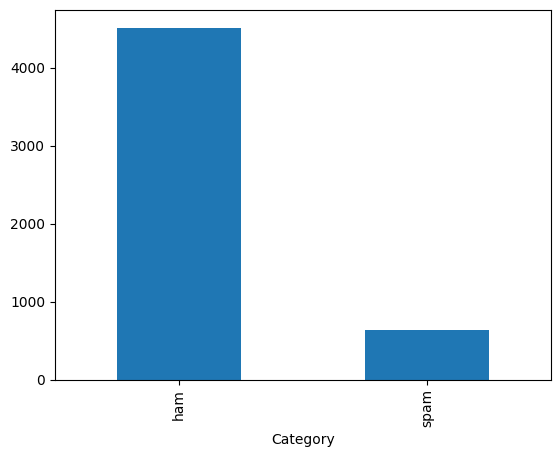

In [226]:
data["Category"].value_counts().plot(kind='bar')

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [228]:
label = {}
for i,j in enumerate(data['Category'].unique()):
    label[j] = i
data['Category'] = data['Category'].map(label)

In [233]:
label

{'ham': 0, 'spam': 1}

In [235]:
ham = data[data['Category'] == 0]
spam = data[data['Category'] == 1]
ham_sampled = ham.sample(n=len(spam), random_state=42)
data = pd.concat([ham_sampled, spam]).sample(frac=1, random_state=42).reset_index(drop=True)


In [236]:
# Count of genuine and fake news

df = data.groupby("Category")["Message"].count()

index = df.index

print("|"+"-"*75+"|")


for idx, value in zip(index, df):
    
    if idx == 0:
    
        print("|"+f"There are {value} records of Genuine Message. {round((value/len(data)*100),2)}%".center(74),"|")
        
        print("|"+"-"*75+"|")
    
    else:
    
        print("|",f"There are {value} records of Spam Message. {round((value/len(data)*100),2)}%".center(73),"|")

print("|"+"-"*75+"|")

|---------------------------------------------------------------------------|
|             There are 641 records of Genuine Message. 50.0%               |
|---------------------------------------------------------------------------|
|                There are 641 records of Spam Message. 50.0%               |
|---------------------------------------------------------------------------|


In [237]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


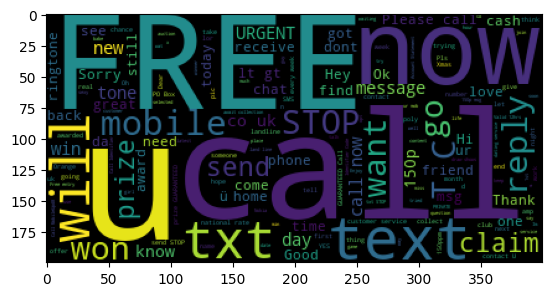

In [238]:
cloud = WordCloud()
text = " ".join(balanced_data["Message"])
img = cloud.generate_from_text(text)
plt.imshow(img)

#### Feature Engineering

    Machine Learning Algorithems accepts only numarical features. In our dataset there are text data in text column. It should be normalized and converted into numarical values(Text Vectorization).
**Text Preprocessing :** Converting every words into lowerCase, Stop Words Removal, Stemming and Lemmatization.    
**Text Vectorization :** Converted into numarical values using Bag of Word.

##### Text Preprocessing

In [239]:
from autocorrect import Speller
speller = Speller()

from emoji import demojize
from contractions import fix
from textacy.preprocessing.remove import accents
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopword = stopwords.words("english")

from nltk.stem import SnowballStemmer
stem = SnowballStemmer("english")

# from nltk.stem import PorterStemmer
# stem = PorterStemmer()

# from nltk.stem import LancasterStemmer
# stem = LancasterStemmer()

from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

def text_pre_processing(text):
    # Lower 
    text = text.lower()
    # Auto Correct 
    text = speller.autocorrect_sentence(text)
    # Emoji
    text = demojize(text)
    # Contractions
    text = fix(text)
    # Accents
    text = accents(text)
    # Puncuations
    text = re.sub(r"[^a-z0-9]"," ",text)
    
    #Tokenizing
    words = word_tokenize(text)
    new_text = []
    for word in words:
        # Stop Words
        if word not in stopword:
            word = stem.stem(word)
            word = lem.lemmatize(word)
            new_text.append(word)
    text = " ".join(new_text)

    return text

In [240]:
data["Message"] = data["Message"].apply(text_pre_processing)

##### Text Vectorization

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [242]:
ml_data = data

label= ml_data.iloc[:,0]

features = ml_data.iloc[:,1]

### Model Building
    Since our dataset is labeled, It comes under Supervised. Also the labled data is discreat data. We are going to apply Clasification Algorithm.

**Some of Popular  Clasification Algorithms are:**
> - Logistic Regression
> - Decision Trees
> - Random Forest
> - Support Vector Machine (SVM)
> - k-Nearest Neighbors (k-NN)
> - Naive Bayes
> - Gradient Boosting Machines (GBM)
> - AdaBoost
> - XGBoost


In [243]:
# It is used for saving and loading the model

import pickle

In [244]:
# Data Spliting

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(features,label,test_size=0.2,random_state=42)

In [245]:
bow = CountVectorizer(stop_words="english",strip_accents="unicode")
X = bow.fit_transform(X_train)
X = pd.DataFrame(X.toarray(),columns=bow.get_feature_names_out())
Y = pd.DataFrame(Y_train).rename(columns={0:"label"}).reset_index(drop=True)

### Logistic Regression

In [246]:
from sklearn.linear_model import LogisticRegression

LogisticReg = LogisticRegression()

LogisticReg.fit(X,Y)

# Save model

with open("../Models/LogisticReg.pkl","wb") as file:
    
    pickle.dump(LogisticReg,file)

### Decision Trees

In [247]:
from sklearn.tree import DecisionTreeClassifier

DTree = DecisionTreeClassifier()

DTree.fit(X,Y)

# Save model

with open("../Models/DTree.pkl","wb") as file:
    
    pickle.dump(DTree,file)

### Random Forest

In [248]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier()

RandomForest.fit(X,Y)

# Save model

with open("../Models/RandomForest.pkl","wb") as file:
    
    pickle.dump(RandomForest,file)

### Support Vector Machine (SVM)

In [249]:
from sklearn.svm import LinearSVC

SVC = LinearSVC()

SVC.fit(X,Y)

# Save model

with open("../Models/SVM.pkl","wb") as file:
    
    pickle.dump(SVC,file)

### k-Nearest Neighbors (k-NN)

In [250]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

KNN.fit(X,Y)

# Save model

with open("../Models/KNN.pkl","wb") as file:
    
    pickle.dump(KNN,file)

### Naive Bayes

In [251]:
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import csr_matrix

NaiveBayes = MultinomialNB()

#X_train_tfidf = csr_matrix(X_train, dtype=np.float64)

NaiveBayes.fit(X,Y)

# Save model

with open("../Models/NaiveBayes.pkl","wb") as file:
    
    pickle.dump(NaiveBayes,file)

### Gradient Boosting Machines (GBM)

In [252]:
from sklearn.ensemble import GradientBoostingClassifier

GBM = GradientBoostingClassifier()

GBM.fit(X,Y)

# Save model

with open("../Models/GBM.pkl","wb") as file:
    
    pickle.dump(GBM,file)

### AdaBoost

In [253]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost = AdaBoostClassifier()

AdaBoost.fit(X,Y)

# Save model

with open("../Models/AdaBoost.pkl","wb") as file:
    
    pickle.dump(AdaBoost,file)

### XGBoost

In [254]:
Y

,Category
0,0
1,1
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,1
1023,1


In [255]:
import xgboost as xgb

params = {
    'objective': 'multi:softmax',  
    'num_class': 2, 
    'max_depth': 2,  
    'learning_rate': 0.1,  
    'eval_metric': 'mlogloss'  
}

dtrain = xgb.DMatrix(X, label=Y)


XGBoost = xgb.train(params, dtrain, num_boost_round=300)

# Save model

with open("../Models/XGBoost.pkl","wb") as file:
    
    pickle.dump(XGBoost,file)

### Model Evaluation
    For classifications there are specificevaluation techniques like:
- Accuracy
- Precision
- F1 Score
- Confusion Matrix
- AUC & ROC

In [256]:
X_t = bow.transform(X_test).toarray()

In [257]:
X_t = pd.DataFrame(X_t,columns=bow.get_feature_names_out())

In [258]:
files

'XGBoost.pkl'

In [259]:
import os
from os import path 
import pickle
models = {}

# os.chdir("Models")
for files in os.listdir():
    file = open(files,"rb")
    name = files.split(".")[0]
    models[name] = pickle.load(file)
    file.close()

In [260]:
model_names = models.keys()

In [261]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from scipy.sparse import csr_matrix


accuracy = {}

def predict(model_name):
    if model_name == "XGBoost":
            dtest = xgb.DMatrix(X_t, label=Y_test)
            Y_pred = models[model_name].predict(dtest)
            acc = accuracy_score(Y_test,Y_pred)
            accuracy[model_name] = acc
        
    elif model_name == "NaiveBayes":
        #     X_t_tfidf = csr_matrix(X_t, dtype=np.float64)
            Y_pred = models[model_name].predict(X_t)
            acc = accuracy_score(Y_test,Y_pred)
            accuracy[model_name] = acc
    else:
        Y_pred = models[model_name].predict(X_t)
        acc = accuracy_score(Y_test,Y_pred)
        accuracy[model_name] = acc
        

In [262]:
model_names

dict_keys(['AdaBoost', 'DTree', 'GBM', 'KNN', 'LogisticReg', 'NaiveBayes', 'RandomForest', 'SVM', 'XGBoost'])

In [263]:
accuracy = {}
for name in model_names:
    print(name)
    predict(name)
print("Done")
    

AdaBoost
DTree
GBM
KNN
LogisticReg
NaiveBayes
RandomForest
SVM
XGBoost
Done


In [264]:
accuracy_test = accuracy
accuracy_test

{'AdaBoost': 0.9260700389105059,
 'DTree': 0.914396887159533,
 'GBM': 0.8988326848249028,
 'KNN': 0.6770428015564203,
 'LogisticReg': 0.9377431906614786,
 'NaiveBayes': 0.9182879377431906,
 'RandomForest': 0.933852140077821,
 'SVM': 0.9494163424124513,
 'XGBoost': 0.9260700389105059}

### Model Deployment

In [268]:

features = ml_data.iloc[:,1]

label = ml_data.iloc[:,0]

bow = CountVectorizer(stop_words="english",strip_accents="unicode")

XX = bow.fit_transform(data.iloc[:,1])

XX = pd.DataFrame(XX.toarray(),columns=bow.get_feature_names_out())



model = LinearSVC()



model.fit(XX,data.iloc[:,0])

# Save Transformation
os.mkdir("Diployment")

with open("Diployment/transformer.pkl","wb") as file:
    
    pickle.dump(bow,file)

# Save model

with open("Diployment/model.pkl","wb") as file:
    
    pickle.dump(model,file)

In [269]:
from sklearn.metrics import accuracy_score

Y_pred = model.predict(XX)

print("|","-"*75,"|")
print("|",str("Model Accuracy is "+str(accuracy_score(data.iloc[:,0], Y_pred))).center(75),"|")
print("|","-"*75,"|")

| --------------------------------------------------------------------------- |
|                            Model Accuracy is 1.0                            |
| --------------------------------------------------------------------------- |


## The model will be deployed in Streamlit applycation